In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [14]:
X_train = np.array([
    [1500, 3, 2, 10],
    [2000, 4, 3, 5],
    [1200, 2, 1, 20],
    [1800, 3, 2, 8],
    [1600, 3, 2, 12]
])
y_train = np.array([300000, 400000, 250000, 350000, 320000])
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [15]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"P2P: {np.ptp(X_train, axis=0)}")
print(f"P2P Normalized: {np.ptp(X_norm, axis=0)}")

P2P: [800   2   2  15]
P2P Normalized: [2.94883912 3.16227766 3.16227766 2.96463531]


In [16]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")

Number of iterations completed: 1000, Number of weight updates: 5001.0


c:\Users\HP\Desktop\Machine-Learning\Linear-Regression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [17]:
w_norm = sgdr.coef_
b_norm = sgdr.intercept_
print(f"Model parameters: w: {w_norm}, b: {b_norm}")

Model parameters: w: [26767.74387283  8864.7471172   8864.7471172  -5390.11832774], b: [323901.64007366]


In [18]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm

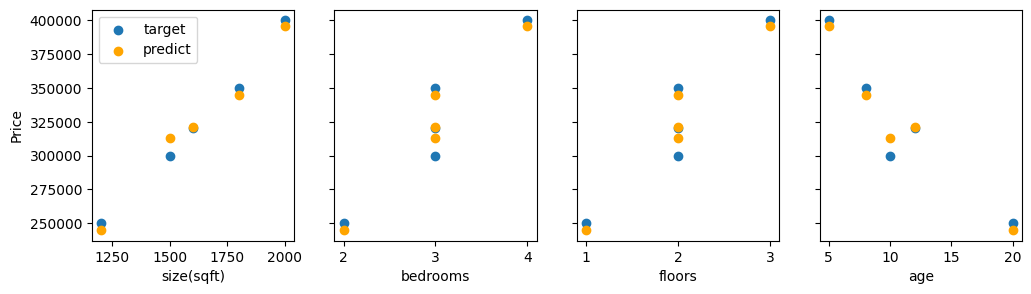

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].scatter(X_train[:, i], y_pred, color='orange', label='predict')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
ax[0].legend()
plt.show()